In [31]:
# MODULE: (2024) 5DATA002W.2 Machine Learning and Data Mining
# Hamza Hassan W2044381
# Python Notebook 3
# Regression Decision Trees Modelling and Ensemble Learning

# Key reminder - I changed some varaible names Tumor_Size - Tumor_Load, Survival_Months - Progression_Free_Months, Mortality_Status - Survival_Status
# Sex - Gender, Progesterone_Status - Progesterone_Levels, Estrogen_Status - Estrogen_Levels, Occupation - Profession, Month_Of_Birth - Birth_Month

# My Notebook 3 was peer-reviewed by Riya (W2036372) and Yusuf (W2040640) on 31st March 2025 at 1:00 PM in Cavendish Library.
# They looked over the following parts of my Python Notebook 3:

# My Decision Tree Regressor implementation and whether it followed the steps correctly.

# They checked the pruning of my Decision Tree (DT-2) to make sure it was properly limited to improve generalisation.

# They also reviewed how I built the Ensemble Learner and whether the base learners were chosen and combined correctly.

# IMPORTING AND LOADING THE BREAST CANCER DATASET AND EXPLORING THE DATA TYPES WITH DATA.INFO()

Code Reuse Session three Step: steps 1 (import pandas, pd.read_csv()),
from sklearn.model_selection import train_test_split Step 6, and
from matplotlib import pyplot as plt step 10. (Importing some of the required libraries) and other steps importing the needed libraries

In [32]:
#Importing all the required libraries that are needed
import pandas as pd # Import pandas for data manipulation (Code Reuse Session 3, Step 1)

import numpy as np

# train_test_split: to split the dataset into training and testing sets
# AND GridSearchCV: for tuning hyperparameters and finding the best model settings
from sklearn.model_selection import train_test_split, GridSearchCV

# The main modelling I’ll be using for regression with decision trees
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics  # To evaluate the performance of the regression model (e.g. MAE, MSE, R2)

from sklearn import tree # For visualizing the decision tree structure later on

import matplotlib.pyplot as plt  # For plotting graphs and visualization (But needed for my decision tree)


Code Reuse Session three Step 2
Loading in the Dataset into the Dataframe

In [33]:
patients = pd.read_csv('/content/CleanedBreastCancerDataset (3) (1).csv') # Loading the Breast Cancer dataset into a DataFrame

Step 4 From the Code Reuse Session three:
Exploring the data types for all the variables in the Breast Cancer dataset,to get a quick summary of the dataset. It provides useful details like the number of entries, the column names, the data types of each column, and how many non-null values each column contains. This helps me understand the structure of the data and quickly identify any issues, like missing values or incorrect data types, before I proceed with analysis or model training, need to see if notebook 1 worked.

In [34]:
patients.info() # Shows a summary of dataset information of the patients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4018 non-null   float64
 1   N_Stage                  4018 non-null   int64  
 2   6th_Stage                4018 non-null   int64  
 3   Grade                    4018 non-null   int64  
 4   Tumor_Load               4018 non-null   float64
 5   Estrogen_Levels          4018 non-null   int64  
 6   Progesterone_Levels      4018 non-null   int64  
 7   Progression_Free_Months  4018 non-null   int64  
 8   Survival_Status          4018 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 282.6 KB


 # REGRESSION MODELLING: Decision Tree Regressor and Hyperparameter Tuning

Step 4 in Code Reuse Session Three: Declaring both your input features and Target feature. explicity dropping the columns Estrogen Levels and Progesterone Levels and especially Progression Free Months because its the target varaible and must be removed.

In [35]:
# I dropped the features that seemed less important for predicting Progression Free Months
X_reg = patients.drop(['Progression_Free_Months', 'Estrogen_Levels', 'Progesterone_Levels'], axis=1)
y_reg = patients['Progression_Free_Months']

Code Reuse Session Three Step 5 - Splitting the Dataset into Training and Testing Subsets

In [36]:
# Splitting the regression dataset into training and test sets (80/20 split), setting a random seed to keep results consistent every time I run it
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)



Code Reuse Session 3 Steps 6 and 7 and Tutorial 6 (Page 13) Intiating and training a Decision Tree Regressor and using Grid search cv to tune with hyperpraremeter to imporve the performance for the model also tuning by Hyperparameter tuning with GridSearchCV, chose to make the param grid range based on Tutorial 6 recommendations. (DT1)

In [37]:
# Intiating the Decision tree regressor and tuning it using Hyperparameter tuning with GridSearchCV
# I chose max_depth=None to allow the tree to grow fully (as recommended in Tutorial 6, Section D)
# I set min_samples_leaf=10 to prevent overfitting during the testing phase
param_grid = {
    'max_depth': [3, 4, 5, None],      # I'm testing different tree depths to see which works best
    'min_samples_leaf': [5, 10, 15]     # I reduced the number of samples per leaf to control overfitting
}

# Initialising the base model for the Decision Tree Regressor with a fixed random state for reproducibility
DT_regressor = DecisionTreeRegressor(random_state=42)

# Setting up GridSearchCV with 5-fold cross-validation to optimize R² score
grid_search = GridSearchCV(
    DT_regressor,
    param_grid,
    scoring='r2',  # I want to maximize the R² score to evaluate the best model
    cv=5,  # I am using 5-fold cross-validation to get more reliable results
)

# Fitting the grid search on the training data to find the best model based on cross-validation
grid_search.fit(X_train_reg, y_train_reg)  # Now, I'm fitting it on the training data (X_train_reg and y_train_reg)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, None],
                         'min_samples_leaf': [5, 10, 15]},
             scoring='r2')

Code Reuse Session Three Steps 6 and 7 used here and also Tutorial 6 (Section E.3) Page 7 - I need this line because after performing hyperparameter tuning with GridSearchCV, it selects the model that gave the best performance (highest R² score) during the cross-validation process. By saving this model as best_DT_regressor, I can use it to make predictions on new data or further evaluate its performance.

In [38]:
# I am retrieving the best model from the grid search based on the highest R² score
best_DT_regressor = grid_search.best_estimator_

Code Reuse Session Three Step 8
Assessing how the DT model will perform in the real world, predicting survival months for new patients. and to produce relevant predictions on your isolated dataset. I need this line because now that I have the best model (best_DT_regressor), I want to use it to make predictions on the test data (X_test_reg). This helps me evaluate how well the model performs on unseen data, giving me an indication of its generalization ability.

In [39]:
# Using the best decision tree model from the grid search to make predictions on the test set
y_pred_reg = best_DT_regressor.predict(X_test_reg)

Code Reuse Session Three Step 9 -

Calculates and prints the regression metics to evaluate the perfomance of the model before pruning. Calculating and printing the Mean Absolute Error, Mean Sqaured Error, and R-Squared(R2). This is the Unpruned tree, DT1.

In [40]:
# Calculating and printing regression metrics to evaluate model performance

# Clear distincition this is DT1 regression metrics  (title)
print("Evaluating DT-1 (Fully Grown Tree):")

# Mean Absoulute Error (MAE) measures the average absolute difference between the actual values
print("MAE:", metrics.mean_absolute_error(y_test_reg, y_pred_reg))

# Mean Squared Error (MSE): Squares errors to penalize large deviations more heavily
print("MSE:", metrics.mean_squared_error(y_test_reg, y_pred_reg))

# R-squared (R2): Proportion of variance in target explained by features
print("R2:", metrics.r2_score(y_test_reg, y_pred_reg))

Evaluating DT-1 (Fully Grown Tree):
MAE: 16.65064115448086
MSE: 411.3088737543902
R2: 0.21873364732005418


Code Reuse Session Three Step 11 - ploting the decision tree model for Progression Free Months, and step 12 saving the decision tree in svg format.

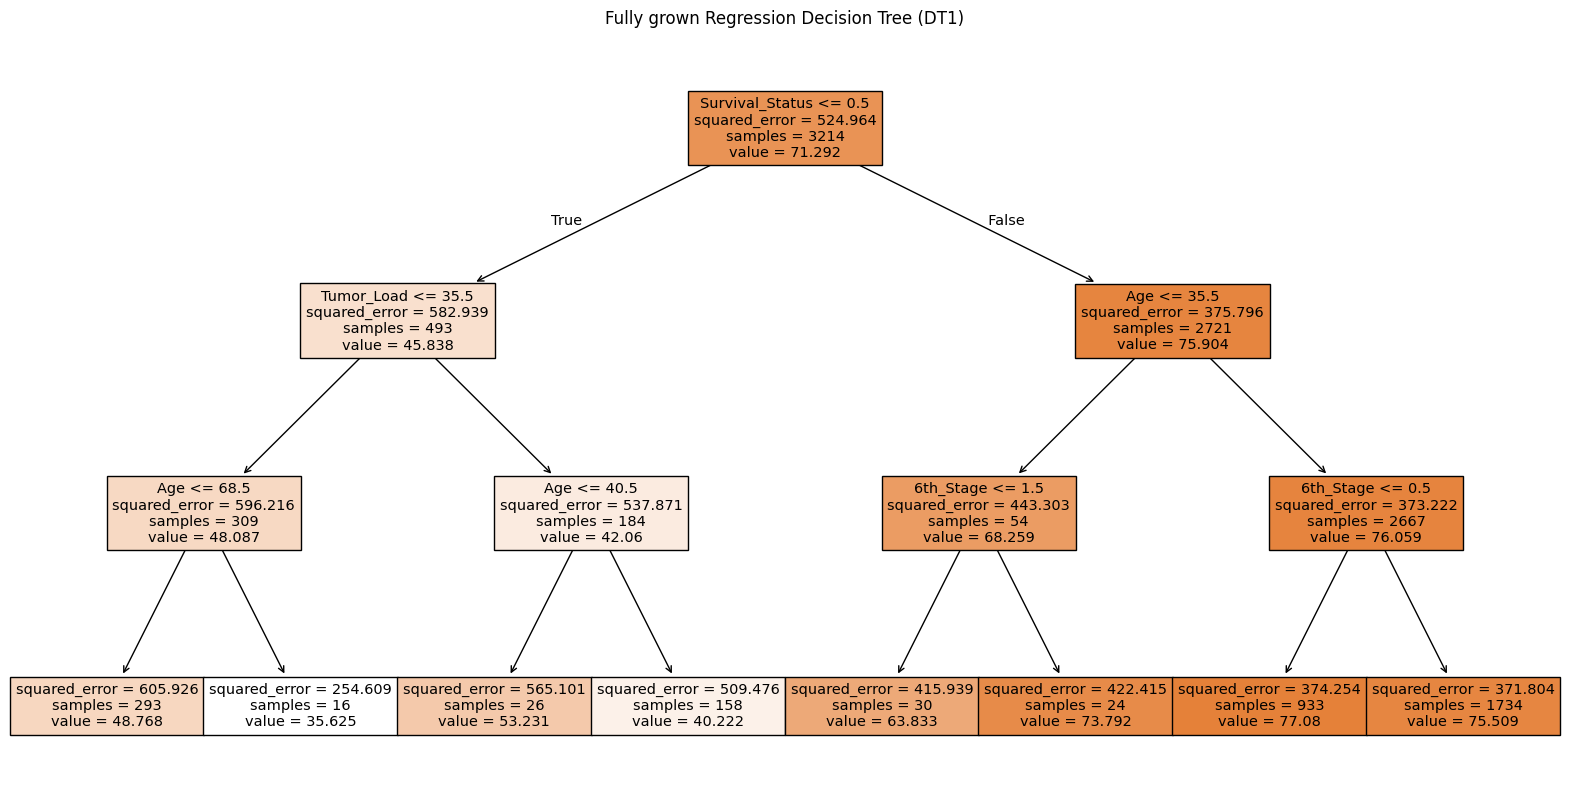

In [41]:
# Plotting the best decision tree found by grid search to visually understand how it's making predictions
plt.figure(figsize=(20,10))  # Making the figure large so the tree is easier to read
tree.plot_tree(best_DT_regressor, feature_names=list(X_train_reg.columns), filled=True)

# Adding a title and saving the tree as a high-resolution SVG image (DT-1)
plt.title("Fully grown Regression Decision Tree (DT1)")
plt.savefig("decision_tree_regression1.svg")

# Displaying the tree plot
plt.show()

Code Reuse Session Three Step 13/ Tutorial 6 for Hyperparameter Choices Section C and D.  - pruning the regression Decision Tree by setting the hyperparameters, then training the pruned descision tree model on training data, then it produces the predictons on the test set using the pruned decision tree model. Making the maximum depth 4 to balance interpretability and performance.

In [42]:
# Initialising a pruned Decision Tree Regressor model (DT-2)
DT_pruned = DecisionTreeRegressor(max_depth=4)  # Pruning to 4 levels as per task

# Training on REGRESSION training data (X_train_reg/y_train_reg)
DT_pruned.fit(X_train_reg, y_train_reg)  # Use regression-specific splits

# Predict on REGRESSION test data (X_test_reg)
y_pred_pruned = DT_pruned.predict(X_test_reg)  # Use regression test set

Code Reuse session 2 step 3 printing regression metrics to evaluate model performance after pruning. Printing the Mean Absolute Error, Mean Squared Error and R-Squared (R2), to if it has improved after Pruning. (DT2)



In [43]:
# Mean Absolute Error (MAE) - measures the average absolute difference between the actual values

# Clear distincition this is the pruned tree DT2 regression metrics (title)
print("Evaluating the DT-2 (Pruned Tree):")

print('MAE:', metrics.mean_absolute_error(y_test_reg, y_pred_pruned))

# Mean Squared Error (MSE) -  Squares errors to penalize large deviations more heavily
print('MSE:', metrics.mean_squared_error(y_test_reg, y_pred_pruned))

# R-squared (R2) - Proportion of variance in target explained by features
print('R2:', metrics.r2_score(y_test_reg, y_pred_pruned))


Evaluating the DT-2 (Pruned Tree):
MAE: 16.661254038542396
MSE: 412.2223565246415
R2: 0.21699851978527518




# CLASSIFICATION MODELLING: Ensemble VotingClassifier



Code Reuse Session Three Step 5 - declaring your input variables (input features) that will be used to help predict Survival Status and the output variable (Survival_Status). Basically its setting up the features x and target variable y for a classification task predicting breast cancer patients' survival status.


In [44]:
# Declaring features (X) and target (y) for survival prediction model
feature_cols = ['Tumor_Load', 'Age', 'N_Stage', 'Progression_Free_Months']  #These features will be used to predict survival status
X_clf = patients[feature_cols] # X here contains the input features
y_clf = patients['Survival_Status']  # y here contains the target feature

Code Reuse Session - Step 7 Splitting the Dataset into Training and Testing

In [45]:
# Splitting data into training (80%) and test sets (20%) while preserving class distribution in y
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

Code Reuse Session 3 Steps 8 and 9 - importing the libraries needed for esemble classfier

In [46]:
# I'm importing the VotingClassifier to combine multiple models and improve predictions through ensemble learning
from sklearn.ensemble import VotingClassifier

# And here I'm importing LogisticRegression as one of the models to include in the ensemble for classification tasks
from sklearn.linear_model import LogisticRegression

# Importing GaussianNB here to use the Naive Bayes classifier, which is another model for the ensemble
from sklearn.naive_bayes import GaussianNB

Tutorial 7 Building Base learners page 3 and page 6 - In this part of my code, I’m setting up two base models that I’ll later use for classification and ensemble learning. I'm declaring a Gaussian Naive Bayes model and my Logistic rgression model, tirst, I’m tuning a Logistic Regression model. I’ve added class_weight='balanced' to make sure the model gives equal attention to both classes in Survival Status due to imbalance in Alive and Dead. I don’t want my model to unfairly favor the majority class Alive. I also adjusted the regularisation strength using C=0.5, which controls how much the model tries to avoid overfitting. A smaller C value means more regularisation. I chose the liblinear solver since it works well with smaller datasets, and set a random_state for reproducibility.

Then, I initialized a Naives Bayes classifier using GaussianNB(). This model is simple but often works surprisingly well, and I’ll compare its performance with logistic regression or combine them in an ensemble later on.

Code Reuse Session Three (Defining the base mdels and leveraging using base learners) - Step 9 I need this line to define the base models for the ensemble. I’m combining Logistic Regression (lr) and Naive Bayes (nb) as the base learners for the VotingClassifier. By using 'soft' voting, the classifier will average the predicted probabilities from each model and make a final decision based on that, which can improve overall performance.

In [47]:
lr = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear', C=0.5)  # Declaring my Logistic Regression model

nb = GaussianNB() # Declaring my Naive Bayes model

base_learners = [('LR', lr), ('NB', nb)]  # I'm defining the base models for the ensemble(shorter  names for Logistic Regression and Naives Bayes)

# Creating the VotingClassifier by combining LR and NB using soft voting average the predicted probabilities from each base model
ensemble = VotingClassifier(base_learners, voting='soft')

Code Reuse Session Three Step 10 -

Trains the voting ensemble algorithm using the dataset subset.

In [48]:
ensemble.fit(X_train_clf, y_train_clf) # Training the ensemble model on the training data

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=0.5, class_weight='balanced',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('NB', GaussianNB())],
                 voting='soft')

Code Reuse Session Three - Stepp 11. This Line would produce predictions on the test set using the trained esemble model.

In [49]:
y_pred_clf = ensemble.predict(X_test_clf) # Here it's Generating predictions on test set using trained ensemble model

Code Reuse Session Three - Calculates and prints the esembles accuracy - I'm using accuracy_score here to check how well my ensemble model did on the test data. It tells me what percentage of predictions were correct. I printed the result so I can easily see if combining the models (Logistic Regression and Naive Bayes) actually worked better than using them on their own. It's a quick way to know if my ensemble is doing a good job

In [50]:
# Calculateing and printing ensemble accuracy
from sklearn.metrics import accuracy_score # I’m importing accuracy_score to evaluate how well the ensemble classifier performs

print("Ensemble Classifier Performance") # Just printing a heading to make the output clearer

print("Ensemble Accuracy:", accuracy_score(y_test_clf, y_pred_clf)) # I’m calculating and printing the accuracy of the ensemble model on the test data

Ensemble Classifier Performance
Ensemble Accuracy: 0.8917910447761194


Step 13 from the Ensemble Learning section of the Code Reuse Session Three. Producing the Confusion Matrix to see how well the esemble model classfies each category (e.g., "Alive" vs. "Dead") - In this part of my project, I created and visualized a confusion matrix to better understand how my ensemble model performed on the test data. I started by comparing the true labels from the test set with the predicted labels generated by the model. To ensure consistency in the order of the classes, I specified the class labels based on the way the model was trained. After computing the confusion matrix, I used a display function to generate a visual representation of it. I also made sure to include the actual class names as labels on the plot, which makes it easier to interpret. Finally, I added a title to clearly indicate that the plot represents the performance of the ensemble learner, and then displayed it. This visualization helps me quickly identify where the model is making correct predictions and where it's misclassifying, making it a valuable tool for evaluating classification performance.

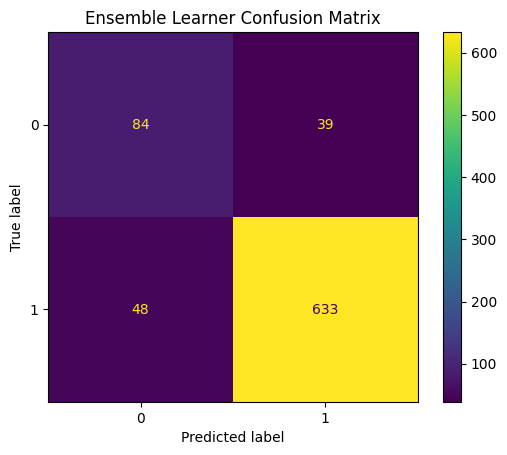

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # I'm importing tools to create and display a confusion matrix to better understand model performance

ensemble_learner_cm_test = confusion_matrix(
    y_test_clf,  # These are the actual labels from the test set
    y_pred_clf,  # These are the predictions made by my ensemble model
    labels=ensemble.classes_  # I included this to make sure the class order stays consistent with how the model was trained
)

ensemble_learner_disp = ConfusionMatrixDisplay(
    confusion_matrix=ensemble_learner_cm_test,
    display_labels=ensemble.classes_  # I used this so the confusion matrix shows the actual class names
)

ensemble_learner_disp.plot()  # This displays the confusion matrix visually using the default grayscale style
ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")  # I added a title to the plot so it's clear what it's showing
plt.show()  # This line actually renders the


Code Reuse Session Three Step 14 - produces and prints a comprehensive classification report for the ensemble model's performance for each class, this is to get a clear view, just the accuracy score could be misleading and it's better to get a wider view.

In [52]:
# Printing the Classification report ---
from sklearn.metrics import classification_report

print("Ensemble Learner Classification Report")
print(classification_report(y_test_clf, y_pred_clf))

Ensemble Learner Classification Report
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       123
           1       0.94      0.93      0.94       681

    accuracy                           0.89       804
   macro avg       0.79      0.81      0.80       804
weighted avg       0.90      0.89      0.89       804



Code Reuse Session Three - Step 15 Plotting a ROC curve to evaluate the esemble models performance - I plotted the ROC curve to evaluate how well my ensemble model distinguishes between the classes in the test set. I used a built-in tool from scikit-learn to generate the ROC curve directly from my trained model and the test data. The ROC curve helps me visualize the trade-off between the true positive rate and the false positive rate at various threshold levels, which is useful for understanding my model's classification performance beyond just accuracy. I added a clear title to the plot to make it easier to interpret, and then displayed it.

Text(0.5, 1.0, 'Ensemble Classifier AUC-ROC Curve')

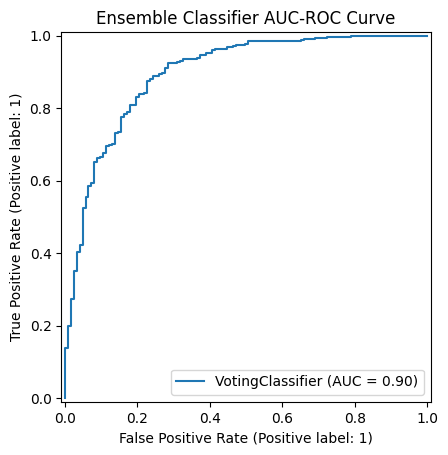

In [53]:
# Importing RocCurveDisplay to help me plot the ROC curve for classification performance (predicting Survival_Status)
from sklearn.metrics import RocCurveDisplay

# Also importing matplotlib to show the plot of ROC curve properly
import matplotlib.pyplot as plt

# Plotting the ROC curve for the Ensemble Learner
RocCurveDisplay.from_estimator(ensemble, X_test_clf, y_test_clf) # I'm using from_estimator so it generates the ROC curve directly from my trained ensemble model
plt.title("Ensemble Classifier AUC-ROC Curve")  # Giving the ROC curve a clear title so I know it’s from my ensemble model when I screenshot it